In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

In [2]:
tickers = ['ACE.BK', 'ADVANC.BK', 'AEONTS.BK', 'AMATA.BK', 'AOT.BK', 'AP.BK', 'AWC.BK', 'BAM.BK',
       'BANPU.BK', 'BBL.BK', 'BCH.BK', 'BCP.BK', 'BCPG.BK', 'BDMS.BK', 'BEC.BK', 'BEM.BK',
       'BGRIM.BK', 'BH.BK', 'BLA.BK', 'BTS.BK', 'CBG.BK', 'CENTEL.BK', 'CHG.BK', 'CK.BK', 'CKP.BK',
       'COM7.BK', 'CPALL.BK', 'CPF.BK', 'CPN.BK', 'CRC.BK', 'DOHOME.BK', 'DTAC.BK', 'EA.BK',
       'EGCO.BK', 'EPG.BK', 'ESSO.BK', 'FORTH.BK', 'GLOBAL.BK', 'GPSC.BK', 'GULF.BK', 'GUNKUL.BK',
       'HANA.BK', 'HMPRO.BK', 'INTUCH.BK', 'IRPC.BK', 'IVL.BK', 'JMART.BK', 'JMT.BK', 'KBANK.BK',
       'KCE.BK', 'KEX.BK', 'KKP.BK', 'KTB.BK', 'KTC.BK', 'LH.BK', 'MAJOR.BK', 'MEGA.BK', 'MINT.BK',
       'MTC.BK', 'ONEE.BK', 'OR.BK', 'ORI.BK', 'OSP.BK', 'PLANB.BK', 'PSL.BK', 'PTG.BK', 'PTT.BK',
       'PTTEP.BK', 'PTTGC.BK', 'QH.BK', 'RATCH.BK', 'RBF.BK', 'RCL.BK', 'SAWAD.BK', 'SCB.BK',
       'SCC.BK', 'SCGP.BK', 'SINGER.BK', 'SPALI.BK', 'SPRC.BK', 'STA.BK', 'STARK.BK', 'STEC.BK',
       'STGT.BK', 'SUPER.BK', 'SYNEX.BK', 'TASCO.BK', 'TCAP.BK', 'THANI.BK', 'TIDLOR.BK',
       'TIPH.BK', 'TISCO.BK', 'TOP.BK', 'TQM.BK', 'TRUE.BK', 'TTA.BK', 'TTB.BK', 'TU.BK', 'VGI.BK',
       'WHA.BK']

ticker_test = ['ACE.BK']

In [3]:
def getData(tickers) :
    data = []
    for ticker in tickers:
        detail = yf.download(ticker, interval='1d')
        detail['Symbol'] = ticker[:-3]
        table_price = detail.reset_index()
        data.append(table_price)
    return data

# data = getData(tickers)

In [4]:
# data[0]

In [5]:
def putDataToCsv(datas):
    with open('stock_data.csv', 'w') as creating_new_csv_file: 
        pass 
    count = 0
    for data in datas:
        if count > 0:
            data.to_csv("stock_data.csv", mode='a', header=False,index=False)
            count+=1
        else:
            data.to_csv("stock_data.csv", mode='a',index=False)
            count+=1
        
# putDataToCsv(data)

In [6]:
df = pd.read_csv("stock_data.csv")
newdf = df[(df.Symbol == 'KBANK')]

In [7]:
newdf.Date = pd.to_datetime(newdf.Date)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714 entries, 186717 to 192430
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5714 non-null   datetime64[ns]
 1   Open       5714 non-null   float64       
 2   High       5714 non-null   float64       
 3   Low        5714 non-null   float64       
 4   Close      5714 non-null   float64       
 5   Adj Close  5714 non-null   float64       
 6   Volume     5714 non-null   int64         
 7   Symbol     5714 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 401.8+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_11284\613473781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.Date = pd.to_datetime(newdf.Date)


In [8]:
newdf = newdf.set_index('Date')
newdf

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-04,44.25,44.75,44.0,44.50,29.177219,10659200,KBANK
2000-01-05,42.25,43.00,41.5,41.75,27.374128,16305600,KBANK
2000-01-06,42.00,42.00,40.5,40.75,26.718462,8241300,KBANK
2000-01-07,41.25,43.00,41.0,42.75,28.029795,6058600,KBANK
2000-01-10,43.75,44.25,42.5,42.75,28.029795,7774300,KBANK
...,...,...,...,...,...,...,...
2022-12-27,144.50,146.00,144.0,145.50,145.500000,10670900,KBANK
2022-12-28,145.50,146.50,145.0,146.00,146.000000,7965800,KBANK
2022-12-29,146.00,147.00,145.0,147.00,147.000000,7432000,KBANK


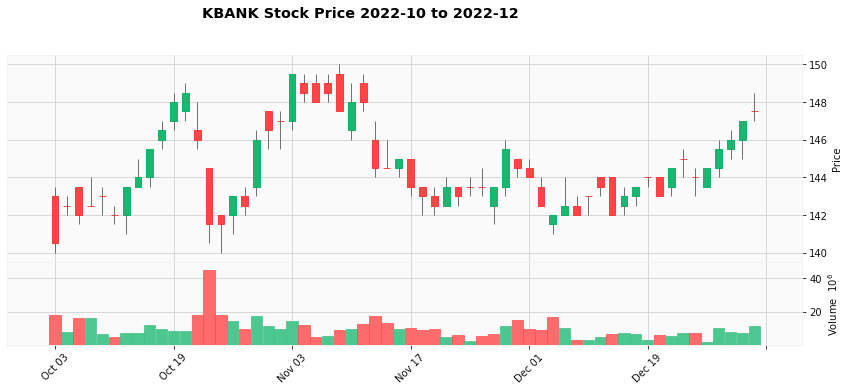

In [9]:
mpf.plot(
    newdf['2022-10':'2022-12'],
    type='candle',
    style='yahoo',
    volume=True,
    title='KBANK Stock Price 2022-10 to 2022-12',
    figratio=(40,15)
 )